# FrozenLake: DQN

In [1]:
import numpy as np
import pandas as pd

filename= 'PennyLane_FrozenLake-v1_Quantum_DQN_all.csv'
df = pd.read_csv(filename)

df = df.drop(["Unnamed: 0"], axis=1)
df.head()

,Log_Negativity,Coherent_Information,Entangling_Capability,Effective_Dimension,Expressibility,Performance
0,3.970000e-08,0.000000e+00,1.197286,NaN,NaN,0.11
1,3.970000e-08,9.210000e-17,1.206565,NaN,29.116226,0.11
2,3.970000e-08,4.440000e-17,1.210094,NaN,19.031595,0.16
3,3.970000e-08,4.510000e-17,1.210114,NaN,17.911391,0.09
4,3.970000e-08,5.290000e-17,1.212265,NaN,17.799224,0.17


In [2]:
# Number of observations to downsample to
target_obs = df['Performance'].count()

# Initialize a dictionary to hold downsampled DataFrames
downsampled_columns = {}

# List of columns to downsample
columns_to_downsample = ["Log_Negativity", "Coherent_Information", "Entangling_Capability", "Effective_Dimension", "Expressibility"]

# Loop through each column, downsample, and store in the dictionary
for column in columns_to_downsample:
    # Ensure column has enough observations for downsampling
    if len(df[column].dropna()) >= target_obs:
        downsampled_columns[column] = df[[column]].dropna().sample(n=target_obs, random_state=42).reset_index(drop=True)
    else:
        print(f"Column {column} does not have enough observations to downsample to {target_obs}.")

# Add the Performance column to the dictionary as is, assuming it already has the correct number of observations
downsampled_columns["Performance"] = df[["Performance"]].dropna().reset_index(drop=True)

In [3]:
# Concatenate all downsampled columns into one DataFrame
# Since they are independent and have been reset index, we can simply concatenate them side by side
data = pd.concat(downsampled_columns.values(), axis=1)

# Renaming columns to ensure they retain their original names
data.columns = downsampled_columns.keys()

# Now, downsampled_df is a single DataFrame containing all the downsampled columns
# You can inspect the first few rows to verify
data

,Log_Negativity,Coherent_Information,Entangling_Capability,Effective_Dimension,Expressibility,Performance
0,-1.880000e-07,1.370000e-16,1.825648,3.208989,212.264957,0.11
1,-9.360000e-08,1.000000e-16,1.984263,3.003928,64.976044,0.11
2,1.030000e-07,3.470000e-17,1.953761,2.828152,192.080031,0.16
3,-1.840000e-07,6.560000e-17,1.929794,3.120558,22.967222,0.09
4,-1.710000e-07,6.110000e-17,1.890436,3.012406,258.712843,0.17
...,...,...,...,...,...,...
528,-1.540000e-07,-5.460000e-17,1.928911,3.206531,153.346907,0.00
529,-3.650000e-08,-1.480000e-16,1.454425,3.108432,28.558819,0.00
530,1.150000e-07,-5.460000e-16,1.985571,3.178955,122.004727,0.00
531,-2.890000e-07,6.170000e-17,1.501376,3.142971,114.401690,0.00


In [4]:
#Import libraries
import cdt
# from cdt import SETTINGS
# SETTINGS.verbose=False
# SETTINGS.NJOBS=16
import networkx as nx
import time

# A warning on R libraries might occur. It is for the use of the r libraries that could be imported into the framework
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os

os.environ['CUDA_VISIBLE_DEVICES']='5'

Detecting 7 CUDA device(s).


In [5]:
# !pip install --upgrade torch

  Using cached torch-2.2.1-cp310-cp310-manylinux1_x86_64.whl.metadata (26 kB)
  Using cached typing_extensions-4.10.0-py3-none-any.whl.metadata (3.0 kB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl.metadata (1.8 kB)
  Using cached triton-2.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.4 kB)
   ╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/755.5 MB 108.6 kB/s eta 1:53:56^C
   ╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/755.5 MB 108.2 kB/s eta 1:54:21
ERROR: Operation cancelled by user


In [6]:
# # Finding the structure of the graph
# from cdt.independence.graph import FSGNN

# obj = FSGNN()

# start_time = time.time()
# ugraph = obj.predict(data)
# print("--- Execution time : %4.4s seconds ---" % (time.time() - start_time))
# nx.draw_networkx(ugraph, font_size=8) # The plot function allows for quick visualization of the graph.
# plt.show()
# # List results
# pd.DataFrame(list(ugraph.edges(data='weight')))

graphical_lasso: did not converge after 2000 iteration: dual gap: -2.826e-04


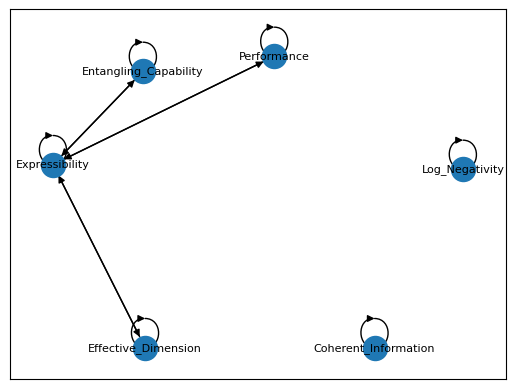

,Cause,Effect,Score
0,Log_Negativity,Log_Negativity,1.549492e+13
1,Coherent_Information,Coherent_Information,5.482663e+31
2,Entangling_Capability,Entangling_Capability,2.108352e+01
3,Entangling_Capability,Expressibility,1.504357e-03
4,Effective_Dimension,Effective_Dimension,4.910030e+01
5,Effective_Dimension,Expressibility,3.562931e-03
6,Expressibility,Entangling_Capability,1.504357e-03
7,Expressibility,Effective_Dimension,3.562931e-03
8,Expressibility,Expressibility,1.502563e-04
9,Expressibility,Performance,9.063024e-03


In [7]:
# from cdt.independence.graph import DecisionTreeRegression
# obj = DecisionTreeRegression()

from cdt.independence.graph import Glasso
obj = Glasso()
ugraph = obj.predict(data)

nx.draw_networkx(ugraph, font_size=8) # The plot function allows for quick visualization of the graph.
plt.show()
# List results
pd.DataFrame(list(ugraph.edges(data='weight')), columns=['Cause', 'Effect', 'Score'])

PC is ran on the skeleton of the given graph.


--- Execution time : 2.69 seconds ---


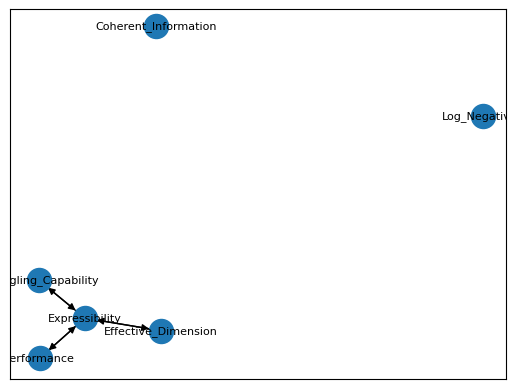

,Cause,Effect,Score
0,Effective_Dimension,Expressibility,1
1,Entangling_Capability,Expressibility,1
2,Expressibility,Effective_Dimension,1
3,Expressibility,Entangling_Capability,1
4,Expressibility,Performance,1
5,Performance,Expressibility,1


In [8]:
from cdt.causality.graph import PC
pc = PC()
start_time = time.time()
dgraph = pc.orient_directed_graph(data, ugraph)
print("--- Execution time : %4.4s seconds ---" % (time.time() - start_time))

# Plot the output graph
nx.draw_networkx(dgraph, font_size=8) # The plot function allows for quick visualization of the graph.
plt.show() 
# Print output results : 
pd.DataFrame(list(dgraph.edges(data='weight')), columns=['Cause', 'Effect', 'Score'])

# FrozenLake: DDQN

In [9]:
import numpy as np
import pandas as pd

filename= 'PennyLane_FrozenLake-v1_Quantum_DDQN_all.csv'
df = pd.read_csv(filename)

df = df.drop(["Unnamed: 0"], axis=1)
df.head()

,Log_Negativity,Coherent_Information,Entangling_Capability,Effective_Dimension,Expressibility,Performance
0,3.970000e-08,0.000000e+00,1.197286,NaN,NaN,0.07
1,3.970000e-08,6.770000e-17,1.204012,NaN,29.614762,0.13
2,3.970000e-08,6.460000e-17,1.208271,NaN,22.885230,0.15
3,3.970000e-08,5.370000e-17,1.211846,NaN,18.071907,0.15
4,3.970000e-08,4.550000e-17,1.211347,NaN,16.829195,0.08


In [10]:
# Number of observations to downsample to
target_obs = df['Performance'].count()

# Initialize a dictionary to hold downsampled DataFrames
downsampled_columns = {}

# List of columns to downsample
columns_to_downsample = ["Log_Negativity", "Coherent_Information", "Entangling_Capability", "Effective_Dimension", "Expressibility"]

# Loop through each column, downsample, and store in the dictionary
for column in columns_to_downsample:
    # Ensure column has enough observations for downsampling
    if len(df[column].dropna()) >= target_obs:
        downsampled_columns[column] = df[[column]].dropna().sample(n=target_obs, random_state=42).reset_index(drop=True)
    else:
        print(f"Column {column} does not have enough observations to downsample to {target_obs}.")

# Add the Performance column to the dictionary as is, assuming it already has the correct number of observations
downsampled_columns["Performance"] = df[["Performance"]].dropna().reset_index(drop=True)

In [11]:
# Concatenate all downsampled columns into one DataFrame
# Since they are independent and have been reset index, we can simply concatenate them side by side
data = pd.concat(downsampled_columns.values(), axis=1)

# Renaming columns to ensure they retain their original names
data.columns = downsampled_columns.keys()

# Now, downsampled_df is a single DataFrame containing all the downsampled columns
# You can inspect the first few rows to verify
data

,Log_Negativity,Coherent_Information,Entangling_Capability,Effective_Dimension,Expressibility,Performance
0,-9.060000e-08,5.340000e-18,1.702303,3.170398,197.260690,0.07
1,2.320000e-07,6.490000e-17,1.608175,2.963482,162.465604,0.13
2,-3.440000e-07,6.940000e-18,1.970827,2.956534,178.621022,0.15
3,-3.340000e-07,-2.250000e-16,1.981273,3.127419,257.967762,0.15
4,-2.240000e-07,1.390000e-17,1.658618,3.095283,257.889531,0.08
...,...,...,...,...,...,...
526,3.300000e-07,-6.090000e-17,1.985427,3.022659,92.830032,0.02
527,-3.820000e-08,1.510000e-16,1.950894,3.195781,257.889531,0.00
528,1.120000e-07,1.020000e-16,1.726487,3.273142,230.565261,0.00
529,-2.270000e-07,-3.750000e-17,1.857724,3.283833,257.889592,0.00


In [12]:
#Import libraries
import cdt
# from cdt import SETTINGS
# SETTINGS.verbose=False
# SETTINGS.NJOBS=16
import networkx as nx
import time

# A warning on R libraries might occur. It is for the use of the r libraries that could be imported into the framework
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os

os.environ['CUDA_VISIBLE_DEVICES']='5'

graphical_lasso: did not converge after 2000 iteration: dual gap: -2.614e-04


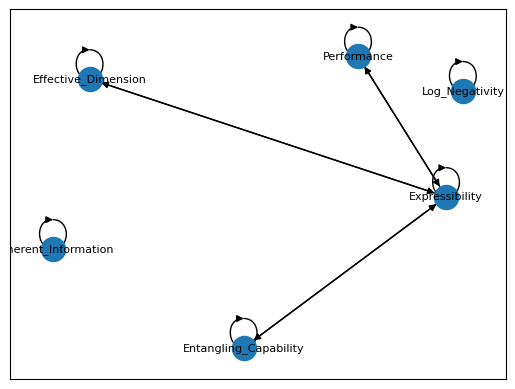

,Cause,Effect,Score
0,Log_Negativity,Log_Negativity,1.797971e+13
1,Coherent_Information,Coherent_Information,6.745296e+31
2,Entangling_Capability,Entangling_Capability,2.059516e+01
3,Entangling_Capability,Expressibility,4.127308e-04
4,Effective_Dimension,Effective_Dimension,7.891654e+01
5,Effective_Dimension,Expressibility,-2.686677e-04
6,Expressibility,Entangling_Capability,4.127308e-04
7,Expressibility,Effective_Dimension,-2.686677e-04
8,Expressibility,Expressibility,1.677722e-04
9,Expressibility,Performance,1.238929e-02


In [13]:
# from cdt.independence.graph import DecisionTreeRegression
# obj = DecisionTreeRegression()
# from cdt.independence.graph import HSICLasso
# obj = HSICLasso()
# from cdt.independence.graph import ARD
# obj = ARD()

from cdt.independence.graph import Glasso
obj = Glasso()

ugraph = obj.predict(data)

nx.draw_networkx(ugraph, font_size=8) # The plot function allows for quick visualization of the graph.
plt.show()
# List results
pd.DataFrame(list(ugraph.edges(data='weight')), columns=['Cause', 'Effect', 'Score'])

PC is ran on the skeleton of the given graph.


--- Execution time : 2.64 seconds ---


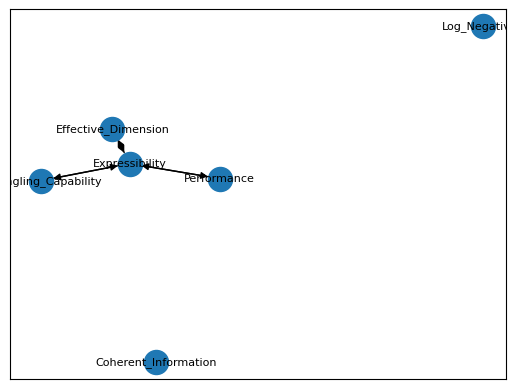

,Cause,Effect,Score
0,Effective_Dimension,Expressibility,1
1,Entangling_Capability,Expressibility,1
2,Expressibility,Effective_Dimension,1
3,Expressibility,Entangling_Capability,1
4,Expressibility,Performance,1
5,Performance,Expressibility,1


In [14]:
from cdt.causality.graph import PC
pc = PC()
start_time = time.time()
dgraph = pc.orient_directed_graph(data, ugraph)
print("--- Execution time : %4.4s seconds ---" % (time.time() - start_time))

# Plot the output graph
nx.draw_networkx(dgraph, font_size=8) # The plot function allows for quick visualization of the graph.
plt.show() 
# Print output results : 
pd.DataFrame(list(dgraph.edges(data='weight')), columns=['Cause', 'Effect', 'Score'])

# FrozenLake: QRDQN

In [15]:
import numpy as np
import pandas as pd

filename= 'PennyLane_FrozenLake-v1_Quantum_QRDQN_all.csv'
df = pd.read_csv(filename)

df = df.drop(["Unnamed: 0"], axis=1)
df.head()

,Log_Negativity,Coherent_Information,Entangling_Capability,Effective_Dimension,Expressibility,Performance
0,3.970000e-08,0.000000e+00,1.197286,NaN,NaN,0.10
1,3.970000e-08,1.190000e-16,1.205604,NaN,32.228844,0.00
2,3.970000e-08,4.800000e-17,1.209561,NaN,24.272162,0.00
3,3.970000e-08,2.360000e-17,1.211865,NaN,20.561727,0.02
4,3.970000e-08,2.020000e-17,1.212813,NaN,19.246389,0.02


In [16]:
# Number of observations to downsample to
target_obs = df['Performance'].count()

# Initialize a dictionary to hold downsampled DataFrames
downsampled_columns = {}

# List of columns to downsample
columns_to_downsample = ["Log_Negativity", "Coherent_Information", "Entangling_Capability", "Effective_Dimension", "Expressibility"]

# Loop through each column, downsample, and store in the dictionary
for column in columns_to_downsample:
    # Ensure column has enough observations for downsampling
    if len(df[column].dropna()) >= target_obs:
        downsampled_columns[column] = df[[column]].dropna().sample(n=target_obs, random_state=42).reset_index(drop=True)
    else:
        print(f"Column {column} does not have enough observations to downsample to {target_obs}.")

# Add the Performance column to the dictionary as is, assuming it already has the correct number of observations
downsampled_columns["Performance"] = df[["Performance"]].dropna().reset_index(drop=True)

In [17]:
# Concatenate all downsampled columns into one DataFrame
# Since they are independent and have been reset index, we can simply concatenate them side by side
data = pd.concat(downsampled_columns.values(), axis=1)

# Renaming columns to ensure they retain their original names
data.columns = downsampled_columns.keys()

# Now, downsampled_df is a single DataFrame containing all the downsampled columns
# You can inspect the first few rows to verify
data

,Log_Negativity,Coherent_Information,Entangling_Capability,Effective_Dimension,Expressibility,Performance
0,8.000000e-08,1.210000e-17,1.204883,3.238313,112.544809,0.10
1,4.580000e-08,3.330000e-17,1.200077,3.217619,26.542686,0.00
2,1.370000e-07,-4.680000e-17,1.208229,3.223701,71.176240,0.00
3,-2.990000e-07,0.000000e+00,1.199487,3.235184,57.144629,0.02
4,-4.600000e-08,-1.040000e-17,1.199020,3.231132,19.531112,0.02
...,...,...,...,...,...,...
599,-3.040000e-08,2.780000e-17,1.190434,3.231979,17.424525,0.18
600,-8.430000e-07,5.300000e-17,1.209481,3.230807,70.311989,0.12
601,-5.760000e-08,-1.110000e-17,1.207916,3.231397,83.795798,0.13
602,1.070000e-07,7.140000e-18,1.205904,3.222433,113.098292,0.09


In [18]:
#Import libraries
import cdt
# from cdt import SETTINGS
# SETTINGS.verbose=False
# SETTINGS.NJOBS=16
import networkx as nx
import time

# A warning on R libraries might occur. It is for the use of the r libraries that could be imported into the framework
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os

os.environ['CUDA_VISIBLE_DEVICES']='5'

graphical_lasso: did not converge after 2000 iteration: dual gap: -6.812e-04


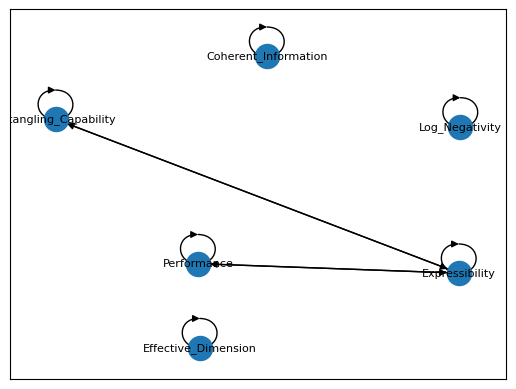

,Cause,Effect,Score
0,Log_Negativity,Log_Negativity,1.576511e+13
1,Coherent_Information,Coherent_Information,4.804934e+32
2,Entangling_Capability,Entangling_Capability,8.308900e+03
3,Entangling_Capability,Expressibility,-2.330625e-02
4,Effective_Dimension,Effective_Dimension,2.687413e+04
5,Expressibility,Entangling_Capability,-2.330625e-02
6,Expressibility,Expressibility,2.639795e-04
7,Expressibility,Performance,1.075485e-02
8,Performance,Expressibility,1.075485e-02
9,Performance,Performance,2.423614e+02


In [19]:
from cdt.independence.graph import Glasso
obj = Glasso()

ugraph = obj.predict(data)

nx.draw_networkx(ugraph, font_size=8) # The plot function allows for quick visualization of the graph.
plt.show()
# List results
pd.DataFrame(list(ugraph.edges(data='weight')), columns=['Cause', 'Effect', 'Score'])

PC is ran on the skeleton of the given graph.


--- Execution time : 3.11 seconds ---


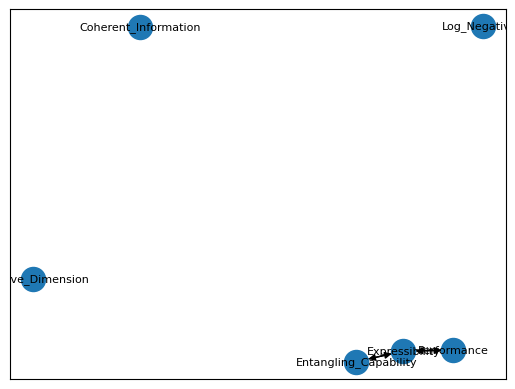

,Cause,Effect,Score
0,Entangling_Capability,Expressibility,1
1,Expressibility,Entangling_Capability,1
2,Expressibility,Performance,1
3,Performance,Expressibility,1


In [20]:
from cdt.causality.graph import PC
pc = PC()
start_time = time.time()
dgraph = pc.orient_directed_graph(data, ugraph)
print("--- Execution time : %4.4s seconds ---" % (time.time() - start_time))

# Plot the output graph
nx.draw_networkx(dgraph, font_size=8) # The plot function allows for quick visualization of the graph.
plt.show() 
# Print output results : 
pd.DataFrame(list(dgraph.edges(data='weight')), columns=['Cause', 'Effect', 'Score'])

In [ ]:
from cdt.causality.graph import CGNN
Cgnn = CGNN(nruns=16, train_epochs=2000, test_epochs=1000, batch_size=1000)
start_time = time.time()
ugraph = Cgnn.create_graph_from_data(data)
print("--- Execution time : %4.4s seconds ---" % (time.time() - start_time))

# Plot the output graph
nx.draw_networkx(ugraph, font_size=8) # The plot function allows for quick visualization of the graph.
plt.show() 
# Print output results : 
pd.DataFrame(list(ugraph.edges(data='weight')), columns=['Cause', 'Effect', 'Score'])

An exhaustive search of the causal structure of CGNN without skeleton is super-exponential in the number of variables.


# FrozenLake: Rainbow

In [1]:
import numpy as np
import pandas as pd

filename= 'PennyLane_FrozenLake-v1_Quantum_Rainbow_all.csv'
df = pd.read_csv(filename)

df = df.drop(["Unnamed: 0"], axis=1)
df.head()

,Log_Negativity,Coherent_Information,Entangling_Capability,Effective_Dimension,Expressibility,Performance
0,3.970000e-08,0.000000e+00,1.197286,NaN,NaN,0.04
1,3.970000e-08,1.070000e-16,1.204445,NaN,33.615273,0.13
2,3.970000e-08,7.300000e-17,1.206617,NaN,29.318341,0.00
3,3.970000e-08,6.660000e-17,1.207878,NaN,28.177129,0.00
4,3.970000e-08,1.780000e-17,1.210306,NaN,21.797902,0.01


In [2]:
# Number of observations to downsample to
target_obs = df['Performance'].count()

# Initialize a dictionary to hold downsampled DataFrames
downsampled_columns = {}

# List of columns to downsample
columns_to_downsample = ["Log_Negativity", "Coherent_Information", "Entangling_Capability", "Effective_Dimension", "Expressibility"]

# Loop through each column, downsample, and store in the dictionary
for column in columns_to_downsample:
    # Ensure column has enough observations for downsampling
    if len(df[column].dropna()) >= target_obs:
        downsampled_columns[column] = df[[column]].dropna().sample(n=target_obs, random_state=42).reset_index(drop=True)
    else:
        print(f"Column {column} does not have enough observations to downsample to {target_obs}.")

# Add the Performance column to the dictionary as is, assuming it already has the correct number of observations
downsampled_columns["Performance"] = df[["Performance"]].dropna().reset_index(drop=True)

In [5]:
# Concatenate all downsampled columns into one DataFrame
# Since they are independent and have been reset index, we can simply concatenate them side by side
data = pd.concat(downsampled_columns.values(), axis=1)

# Renaming columns to ensure they retain their original names
data.columns = downsampled_columns.keys()

# Now, downsampled_df is a single DataFrame containing all the downsampled columns
# You can inspect the first few rows to verify
data

,Log_Negativity,Coherent_Information,Entangling_Capability,Effective_Dimension,Expressibility,Performance
0,2.450000e-07,0.000000e+00,1.173493,3.267100,62.445550,0.04
1,3.420000e-08,-4.160000e-17,1.198156,3.274993,80.716810,0.13
2,-3.640000e-08,1.710000e-17,1.209754,3.262115,76.259606,0.00
3,3.970000e-08,3.620000e-17,1.206981,3.162023,88.504778,0.00
4,5.060000e-08,-2.220000e-17,1.136437,3.214411,23.207134,0.01
...,...,...,...,...,...,...
562,-1.720000e-07,-2.220000e-17,1.333919,3.256048,13.567764,0.14
563,-4.860000e-08,4.080000e-17,1.296516,3.273227,18.328885,0.08
564,-8.840000e-08,5.550000e-17,1.146116,3.202573,63.188102,0.12
565,-2.060000e-08,-4.130000e-17,1.220050,3.269483,110.522954,0.06


In [3]:
#Import libraries
import cdt
# from cdt import SETTINGS
# SETTINGS.verbose=False
# SETTINGS.NJOBS=16
import networkx as nx
import time

# A warning on R libraries might occur. It is for the use of the r libraries that could be imported into the framework
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os

os.environ['CUDA_VISIBLE_DEVICES']='5'

Detecting 2 CUDA device(s).


graphical_lasso: did not converge after 2000 iteration: dual gap: -1.979e-04


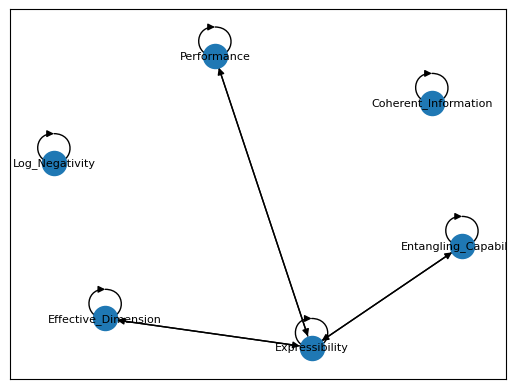

,Cause,Effect,Score
0,Log_Negativity,Log_Negativity,1.861108e+13
1,Coherent_Information,Coherent_Information,6.146538e+32
2,Entangling_Capability,Entangling_Capability,3.630800e+02
3,Entangling_Capability,Expressibility,1.852977e-03
4,Effective_Dimension,Effective_Dimension,1.892738e+03
5,Effective_Dimension,Expressibility,3.927095e-03
6,Expressibility,Entangling_Capability,1.852977e-03
7,Expressibility,Effective_Dimension,3.927095e-03
8,Expressibility,Expressibility,3.622627e-04
9,Expressibility,Performance,-4.113345e-03


In [6]:
from cdt.independence.graph import Glasso
obj = Glasso()

ugraph = obj.predict(data)

nx.draw_networkx(ugraph, font_size=8) # The plot function allows for quick visualization of the graph.
plt.show()
# List results
pd.DataFrame(list(ugraph.edges(data='weight')), columns=['Cause', 'Effect', 'Score'])

PC is ran on the skeleton of the given graph.


--- Execution time : 3.58 seconds ---


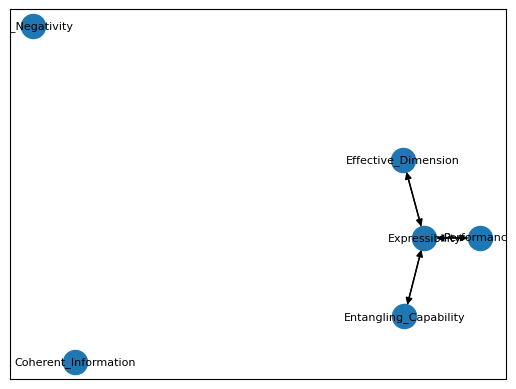

,Cause,Effect,Score
0,Effective_Dimension,Expressibility,1
1,Entangling_Capability,Expressibility,1
2,Expressibility,Effective_Dimension,1
3,Expressibility,Entangling_Capability,1
4,Expressibility,Performance,1
5,Performance,Expressibility,1


In [7]:
from cdt.causality.graph import PC
pc = PC()
start_time = time.time()
dgraph = pc.orient_directed_graph(data, ugraph)
print("--- Execution time : %4.4s seconds ---" % (time.time() - start_time))

# Plot the output graph
nx.draw_networkx(dgraph, font_size=8) # The plot function allows for quick visualization of the graph.
plt.show() 
# Print output results : 
pd.DataFrame(list(dgraph.edges(data='weight')), columns=['Cause', 'Effect', 'Score'])

In [8]:
# from cdt import SETTINGS
# SETTINGS.verbose=False
# SETTINGS.NJOBS=16

In [9]:
# from cdt.causality.graph import CGNN
# Cgnn = CGNN(nruns=16, train_epochs=1000, test_epochs=500, batch_size=100)
# start_time = time.time()
# dgraph = Cgnn.orient_undirected_graph(data, ugraph)
# print("--- Execution time : %4.4s seconds ---" % (time.time() - start_time))

# # Plot the output graph
# nx.draw_networkx(dgraph, font_size=8) # The plot function allows for quick visualization of the graph.
# plt.show() 
# # Print output results : 
# pd.DataFrame(list(dgraph.edges(data='weight')), columns=['Cause', 'Effect', 'Score'])

The pairwise GNN model is computed on each edge of the UMG to initialize the model and start CGNN with a DAG
Process Process-2:
Traceback (most recent call last):
  File "/home/connectome/justin/.conda/envs/justin/lib/python3.10/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/connectome/justin/.conda/envs/justin/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/connectome/justin/.conda/envs/justin/lib/python3.10/site-packages/cdt/utils/parallel.py", line 54, in worker_subprocess
    output = function(*args, **kwargs, device=device, idx=idx)
  File "/home/connectome/justin/.conda/envs/justin/lib/python3.10/site-packages/cdt/causality/pairwise/GNN.py", line 142, in GNN_instance
    GNNXY = GNN_model(batch_size, nh=nh, **kwargs).to(device)
  File "/home/connectome/justin/.conda/envs/justin/lib/python3.10/site-packages/torch/nn/modules/module.py", line 1160, in to
    return self._apply

AttributeError: module 'networkx' has no attribute 'adj_matrix'